In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./df_final.csv")

In [3]:
nlp = spacy.load("fr_core_news_md")

In [7]:
# colonne lemmatisée

def lemmatisation(annonce):
    doc = nlp(annonce)
    annonce_lemmatisee = ' '.join([token.lemma_ for token in doc])
    return annonce_lemmatisee

In [8]:
df["Annonces lemmatisees"] = df["Annonces"].apply(lemmatisation)

In [27]:
# colonne sans stopwords

def sans_stopwords(annonce):
    doc=nlp(annonce)
    annonce_sans_sw = ' '.join([token.text for token in doc if not token.is_stop])
    return annonce_sans_sw

In [28]:
df["Annonces sans stopwords"] = df["Annonces"].apply(sans_stopwords)

In [30]:
# colonne lemmatisée sans stopwords

def lem_sans_sw(annonce):
    doc=nlp(annonce)
    annonce_lem_sans_sw = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return annonce_lem_sans_sw

In [31]:
df["Annonces lemmatisées sans stopwords"] = df["Annonces"].apply(lem_sans_sw)

In [5]:
# pipeline spacy cleanser

import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

In [17]:
pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    removers.remove_number_token,
    mutators.mutate_lemma_token,
)

In [65]:
def spacyclean(annonce):
    annonce_clean=pipeline.clean([annonce])
    for i in annonce_clean:
        return i

In [68]:
df["Annonces spacy_clean"] = df["Annonces"].apply(spacyclean)

Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 26.65it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 30.04it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 28.49it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 31.56it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 31.83it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 40.65it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 23.86it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 33.23it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 40.44it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 47.06it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 24.26it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 20.92it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 23.13it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 34.25it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 25.07it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 24.66it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 25.36it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 31.45it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 36.28it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 48.79it/s]


Cleaning Progress: 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]


In [20]:
# Mots plus fréquents

from collections import Counter
data=Counter(" ".join(df["Annonces lemmatisées sans stopwords"]).split()).most_common(50)
df_mots_freq=pd.DataFrame(data)

In [41]:
# Longueur moyenne des annonces

def longueur(annonce):
    return len(annonce)
    

df["Longueur de l'annonce"]=df["Annonces"].apply(longueur)

,Ville,Année,Mois,Jour,Annonces,Annonces lemmatisees,Annonces sans stopwords,Annonces lemmatisées sans stopwords,Annonces spacy_clean,Longueur de l'annonce
0,Paris,1804,3,30,"Une personne de 24 ans, d'un extérieur agréabl...","un personne de 24 an , de un extérieur agréabl...","24 ans , extérieur agréable , reçu éducation ,...","24 an , extérieur agréable , recevoir éducatio...",an extérieur agréable recevoir éducation joind...,678
1,Paris,1804,3,30,"Une demoiselle, âgée de 28 ans, sachant parfai...","un demoiselle , âger de 28 an , savoir parfait...","demoiselle , âgée 28 ans , sachant parfaitemen...","demoiselle , âger 28 an , savoir parfaitement ...",demoisell âger an savoir parfaitement bien tra...,320
2,Paris,1804,3,30,"Une femme de 30 ans, sachant faire la cuisine,...","un femme de 30 an , savoir faire le cuisine , ...","femme 30 ans , sachant faire cuisine , coudre ...","femme 30 an , savoir faire cuisine , coudre bl...",femme an savoir faire cuisine coudre blanchir ...,258
3,Paris,1804,3,30,"Un citoyen d'un âge mûr, sachant raser, coëffe...","un citoyen de un âge mûr , savoir raser , coëf...","citoyen âge mûr , sachant raser , coëffer , fa...","citoyen âge mûr , savoir raser , coëffer , fai...",citoyen âge mûr savoir raser coëffer faire pet...,474
4,Paris,1804,3,30,"Une jeune personne, âgée de 17 ans, sachant li...","un jeune personne , âger de 17 an , savoir lir...","jeune , âgée 17 ans , sachant lire , écrire , ...","jeune , âger 17 an , savoir lire , écrire , bl...",jeune âger an savoir lire écrire blanchir repa...,388
...,...,...,...,...,...,...,...,...,...,...
5059,Bordeaux,1758,11,9,Un jeune homme qui a tenu pendant trois ans le...,un jeune homme qui avoir tenir pendant trois a...,"jeune homme tenu ans Livres , Comptoir , deman...","jeune homme tenir an livre , comptoir , demand...",jeune homme tenir an livre comptoir demande pl...,179
5060,Bordeaux,1758,8,1,"Un jeune homme de 23 à 24 ans, qui sçait bien ...","un jeune homme de 23 à 24 an , qui sçer bien é...","jeune homme 23 24 ans , sçait bien écrire , de...","jeune homme 23 24 an , sçer bien écrire , dema...",jeune homme an sçer bien écrire demande placer...,176
5061,Bordeaux,1759,6,14,"„ Minimes, qui commençoient à s'établir en » F...","„ minime , qui commençoier à se établir en » F...","„ Minimes , commençoient établir » France , & ...","„ minime , commençoier établir » France , et S...",minime commençoier établir France Saint Franço...,297
5062,Bordeaux,1760,3,6,Le sacrifice que les Français ont fait de leur...,le sacrifice que le français avoir faire de so...,sacrifice Français - selle argent besoins Etat...,sacrifice français - selle argent besoin etat ...,sacrifice français sell argent besoin etat fig...,1809


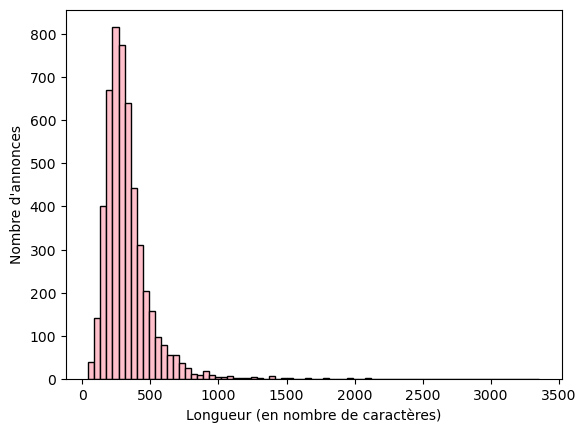

In [42]:
plt.hist(df["Longueur de l'annonce"],edgecolor='black', color="pink", bins=75)
plt.xlabel('Longueur (en nombre de caractères)')
plt.ylabel("Nombre d'annonces")
plt.show()

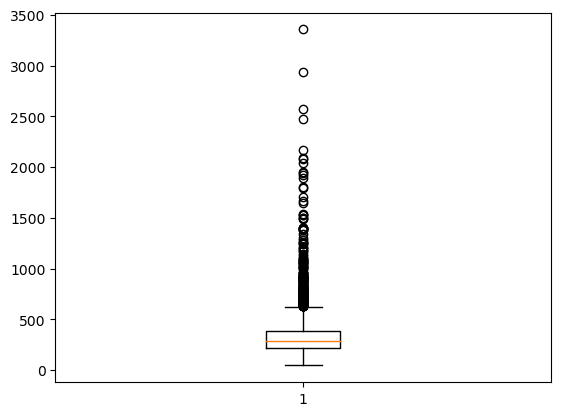

In [44]:
bp=plt.boxplot(df["Longueur de l'annonce"])

In [9]:
# Répétition annonces

df["Annonces spacy_clean"].nunique()

4981

In [34]:
df_repet = df[df["Annonces spacy_clean"].duplicated(keep=False)]
df_repet

,Ville,Année,Mois,Jour,Annonces,Annonces lemmatisees,Annonces sans stopwords,Annonces lemmatisées sans stopwords,Annonces spacy_clean
1,Paris,1804,3,30,"Une demoiselle, âgée de 28 ans, sachant parfai...","un demoiselle , âger de 28 an , savoir parfait...","demoiselle , âgée 28 ans , sachant parfaitemen...","demoiselle , âger 28 an , savoir parfaitement ...",demoisell âger an savoir parfaitement bien tra...
15,Paris,1804,3,29,"Un jeune homme arrivant des départemens, desir...","un jeune homme arriver un départemen , desire ...","jeune homme arrivant départemens , desire trou...","jeune homme arriver départemen , desire trouve...",jeune homme arriver départemen desire trouver ...
42,Paris,1804,2,27,"Un homme d'un âge mûr, ayant ses maîtres pour ...","un homme de un âge mûr , avoir son maître pour...","homme âge mûr , maîtres répondans , sachant li...","homme âge mûr , maître répondan , savoir lire ...",homme âge mûr maître répondans savoir lire écr...
44,Paris,1804,2,27,"Une jeune femme sans enfans, grande, forte et ...","un jeune femme sans enfan , grand , fort et de...","jeune femme enfans , grande , forte phy - siqu...","jeune femme enfan , grand , fort phy - siqu ag...",jeune femme enfan grand fort phy siqu agréable...
53,Paris,1804,2,24,"Une dame, qui a éprouvé des malheurs , desirer...","un dame , qui avoir éprouver un malheur , desi...","dame , éprouvé malheurs , desireroit trouver P...","dame , éprouver malheur , desireroit trouver p...",dame éprouver malheur desireroit trouver place...
...,...,...,...,...,...,...,...,...,...
4465,Lyon,1764,7,18,"§ 4. Un homme d'un âge mûr, souhaiteroit trouv...","§ 4 . un homme de un âge mûr , souhaiteroit tr...","§ 4 . homme âge mûr , souhaiteroit trouver pla...","§ 4 . homme âge mûr , souhaiteroit trouver pla...",homme âge mûr souhaiteroit trouver place châte...
5037,Bordeaux,1783,10,3,"Un domestique d'environ quarante ans, sa-chant...","un domestique de environ quarante an , son - c...","domestique ans , - chant bien service , courir...","domestique an , - chant bien service , courir ...",domestique an chant bien service courir poste ...
5038,Bordeaux,1783,10,3,"Un jeune homme de dix-sept à dix-huit ans, sac...","un jeune homme de dix-sept à dix-huit an , sav...","jeune homme ans , sachant écrire & chiffrer , ...","jeune homme an , savoir écrire et chiffrer , v...",jeune homme an savoir écrire chiffrer voudroit...
5041,Bordeaux,1783,10,3,"Un domestique d'environ quarante ans, sa-chant...","un domestique de environ quarante an , son - c...","domestique ans , - chant bien service , courir...","domestique an , - chant bien service , courir ...",domestique an chant bien service courir poste ...


In [39]:
df1 = df_repet.groupby("Annonces spacy_clean").apply(lambda x: tuple(x.index)).reset_index(name='idx')
df1

,Annonces spacy_clean,idx
0,Demoiselle fort adroit faire mo robe coëffer b...,"(2692, 2696)"
1,Unefemme veuf enfan âger an savoir faire cuisi...,"(734, 777)"
2,an savoir cuisine bourgeois coudre blanchir re...,"(160, 188)"
3,an savoir parfaitement faire cui sine pâtisser...,"(69, 138, 145)"
4,baignoire forme ovale pied pouce longueur pouc...,"(109, 147)"
...,...,...
69,âgé an savoir faire cuisine bour geois bien tr...,"(748, 757)"
70,âgé an savoir faire cuisine bourgeois coudre b...,"(281, 303)"
71,âgé an savoir faire petit cui sine coudre blan...,"(736, 1014)"
72,âgé au savoir faire cuisine cou dre blanchir r...,"(799, 828)"


In [ ]:
df.to_csv("/home/mailan/Bureau/df_final.csv", index=False)